# Лабораторная работа №1: проведение исследований с алгоритмом KNN. Регрессия

Импорты

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

Датасет - Electric Motor Temperature. Цель регрессии - предсказать температуру ротора электрического двигателя

In [5]:
dt = pd.read_csv('measures_v2.csv')
dt.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


Значение колонок:

- `u_q` - Измерение q-компоненты напряжения в dq-координатах (В)
- `coolant` - Температура охлаждающей жидкости (°C)
- `stator_winding` - Температура обмотки статора, измеренная термопарами (°C)
- `u_d` - Измерение d-компоненты напряжения в dq-координатах (В)
- `stator_tooth` - Температура зубца статора, измеренная термопарами (°C)
- `motor_speed` - Скорость двигателя (об/мин)
- `i_d` - Измерение d-компоненты тока в dq-координатах (А)
- `i_q` - Измерение q-компоненты тока в dq-координатах (А)
- `pm` - Температура постоянных магнитов, измеренная термопарами и переданная по беспроводной связи (°C)
- `stator_yoke` - Температура ярма статора, измеренная термопарами (°C)
- `ambient` - Температура окружающей среды (°C)
- `torque` - Крутящий момент (Нм)
- `profile_id` - Идентификатор профиля нагрузки/режима

## Бейзлайн

Предсказание моделью KNN

In [6]:


# признаки и цель
feature_cols = [
    "u_q",
    "coolant",
    "u_d",
    "motor_speed",
    "i_d",
    "i_q",
    "ambient",
    "torque",
    "profile_id",
]
X = dt[feature_cols]
y = dt["pm"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# фиксированное число соседей
N_NEIGHBORS = 5

model = Pipeline(
    [
        ("model", KNeighborsRegressor(n_neighbors=N_NEIGHBORS)),
    ]
)
model

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None


Обучение с количеством соседей 5

In [7]:
%time model.fit(X_train, y_train)

print("Используемое n_neighbors:", N_NEIGHBORS)


CPU times: user 658 ms, sys: 36.7 ms, total: 695 ms
Wall time: 713 ms
Используемое n_neighbors: 5


Обучение модели и вывод метрик r2, mae, mse

In [8]:
# оценка на тесте
best_model = model

y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"MSE: {rmse:.3f}")
print(f"R2:   {r2:.3f}")

# примеры предсказаний
results_sample = pd.DataFrame({
    "y_true": y_test.iloc[:10].values,
    "y_pred": y_pred[:10],
})
results_sample

MAE:  2.473
MSE: 29.187
R2:   0.919


,y_true,y_pred
0,90.431534,89.454037
1,81.452672,81.460247
2,67.810123,57.807057
3,63.638145,63.627417
4,73.154007,73.358321
5,34.920715,34.946406
6,74.650510,74.761460
7,47.301857,47.332196
8,65.738054,56.896298
9,59.400782,60.439828


## Улучшенный бейзлайн
### Анализ датасета

In [9]:
print("Shape:", dt.shape)

print("\nColumn types:")
print(dt.dtypes)

print("\nMissing values (top 10):")
missing = dt.isna().sum().sort_values(ascending=False)
display(missing.head(10))

print("\nBasic stats (numeric):")
display(dt.describe(include='number').T)


Shape: (1330816, 13)

Column types:
u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

Missing values (top 10):


u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
dtype: int64


Basic stats (numeric):


,count,mean,std,min,25%,50%,75%,max
u_q,1330816.0,54.279005,44.173234,-25.290930,12.069925,48.938181,90.034393,133.036994
coolant,1330816.0,36.229995,21.786149,10.623751,18.698135,26.900141,49.857487,101.598512
stator_winding,1330816.0,66.342745,28.672061,18.585815,42.787957,65.110129,88.141137,141.362885
u_d,1330816.0,-25.133809,63.091972,-131.530411,-78.690904,-7.429755,1.470271,131.469788
stator_tooth,1330816.0,56.878582,22.952233,18.133976,38.416012,56.036345,75.586682,111.946423
motor_speed,1330816.0,2202.080728,1859.663350,-275.549144,317.110665,1999.976685,3760.639058,6000.015137
i_d,1330816.0,-68.716810,64.933233,-278.003632,-115.406060,-51.093763,-2.979688,0.051897
i_q,1330816.0,37.412782,92.181880,-293.426793,1.095863,15.774007,100.612150,301.707855
pm,1330816.0,58.506776,19.001498,20.856956,43.151582,60.266287,72.008371,113.606628
stator_yoke,1330816.0,48.187965,19.991004,18.076689,31.990333,45.625509,61.460828,101.147964


Распределение признаков

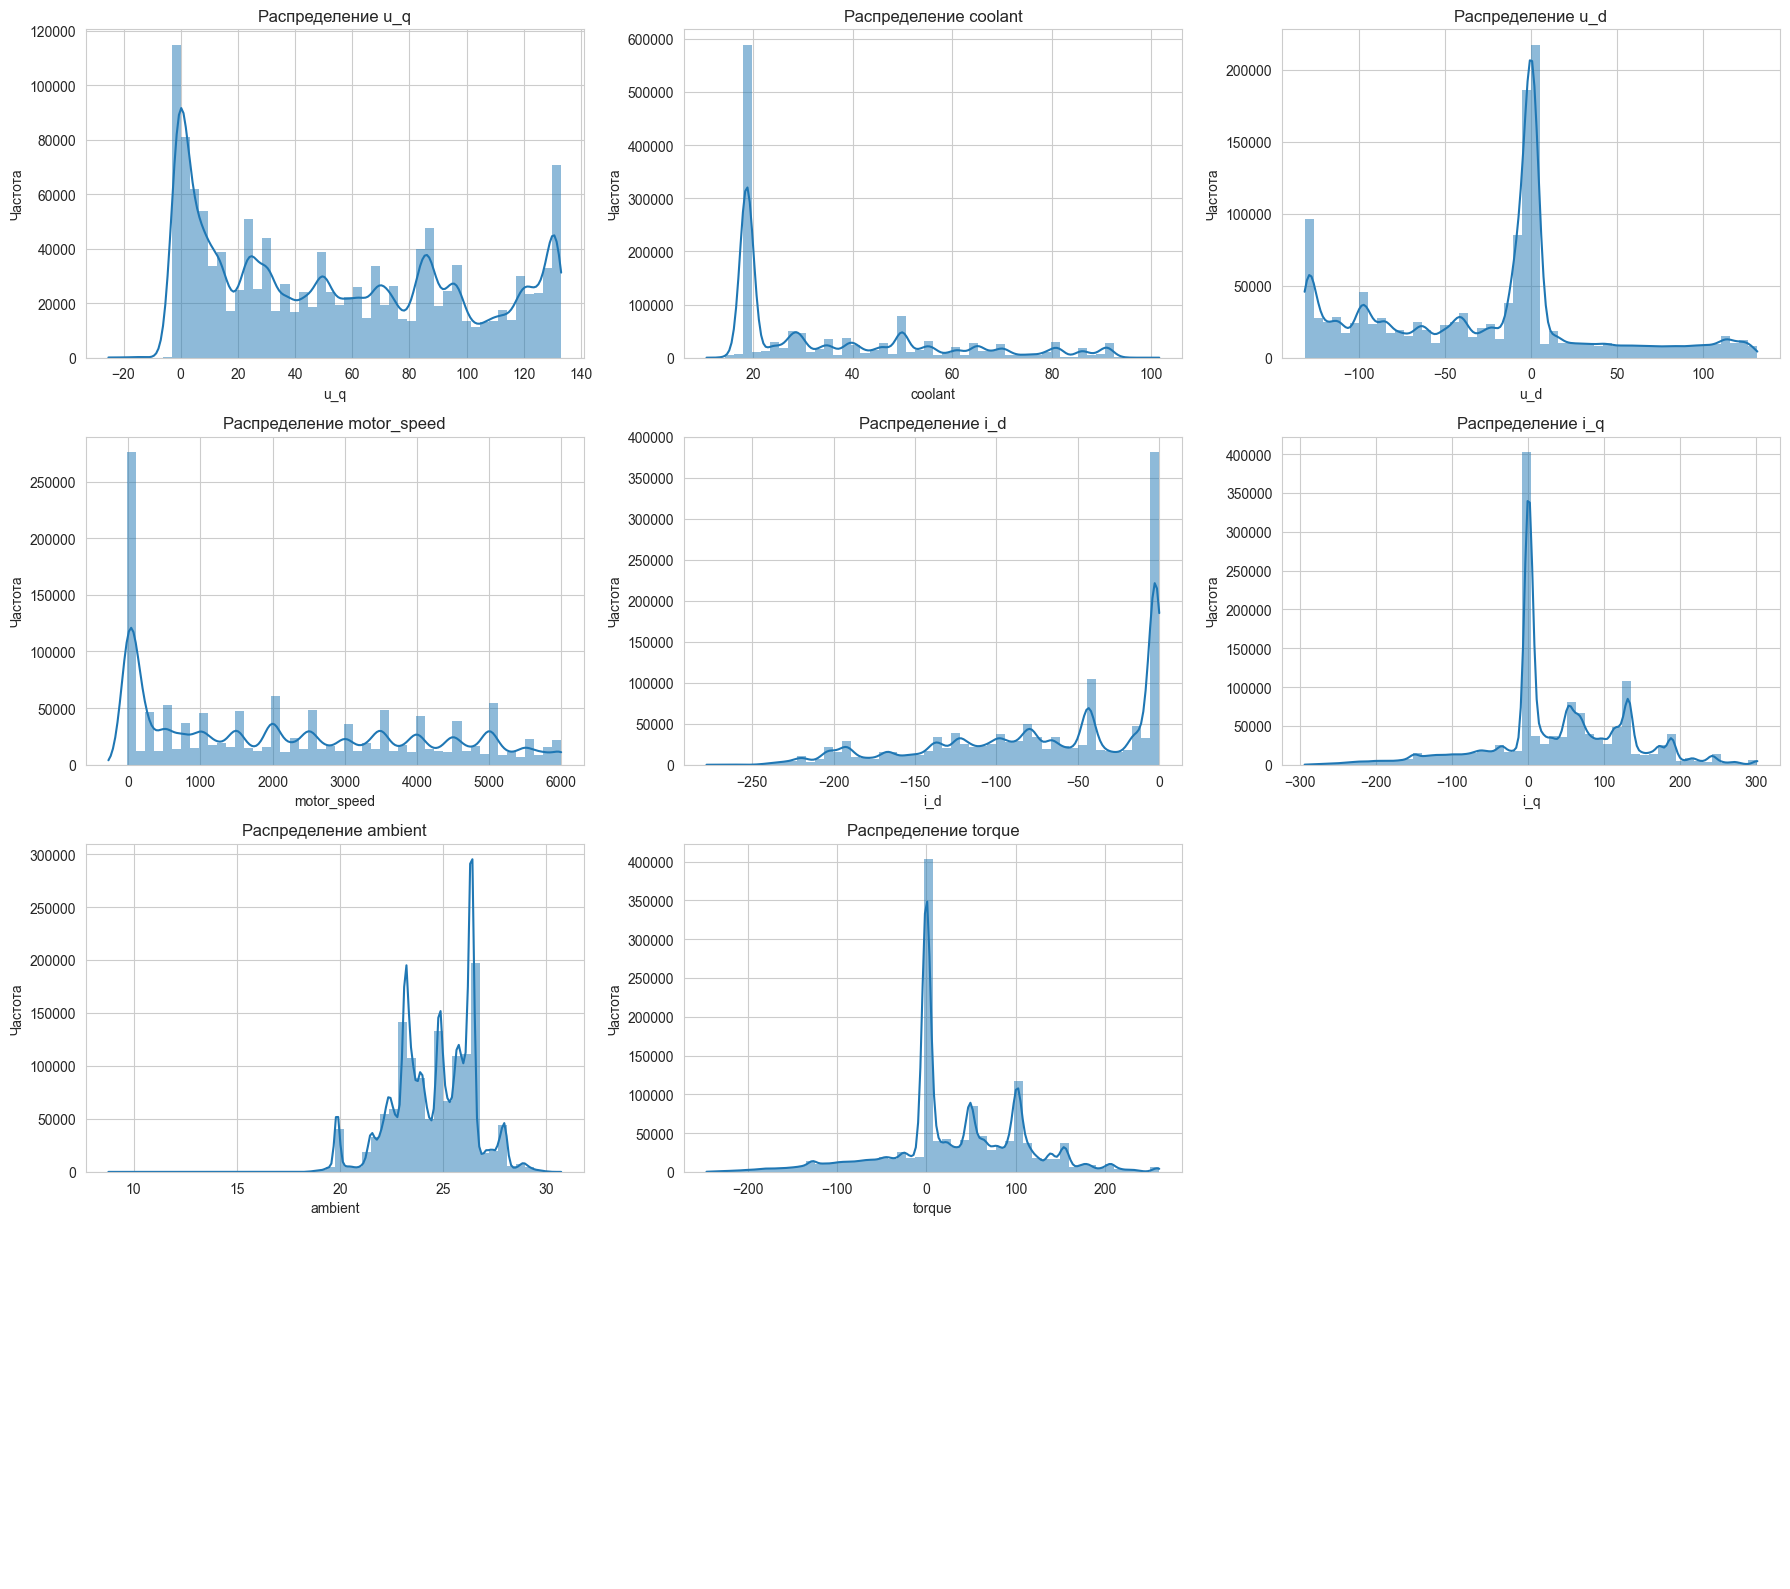

In [ ]:
numeric_cols = [
    "u_q",
    "coolant",
    "u_d",
    "motor_speed",
    "i_d",
    "i_q",
    "ambient",
    "torque",
    "pm"
]

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
for ax, col in zip(axes.ravel(), numeric_cols):
    sns.histplot(dt[col], bins=50, kde=True, ax=ax, edgecolor="none")
    ax.set_title(f"Распределение {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Частота")

# скрываем пустые подграфики если столбцов меньше размера сетки
for ax in axes.ravel()[len(numeric_cols) :]:
    ax.axis("off")

plt.tight_layout()
plt.show()

Корреляция признаков

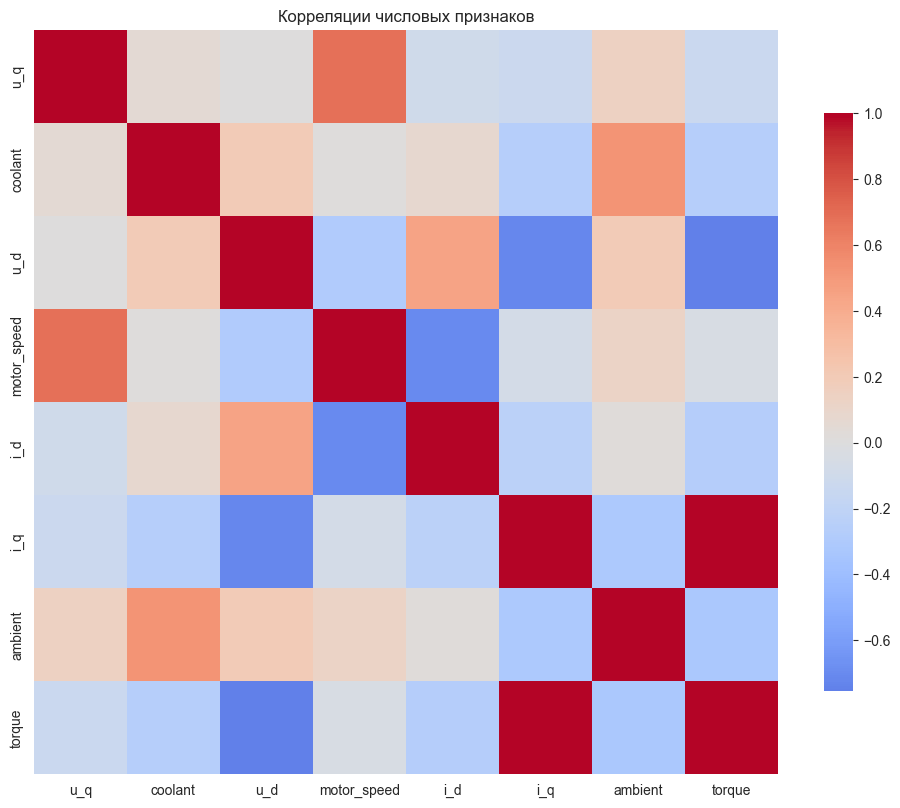

In [11]:
corr = dt[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.75},
)
plt.title("Корреляции числовых признаков")
plt.show()

Введём новые признаки:

$i_d^2, i_q^2$ - квадраты сил тока, используются в законе Джоуля-Ленца

$\text{motor\_speed}^2$ - квадрат скорости, может отражать нелинейные эффекты

$\text{mechanical\_power} = \text{torque} * \text{motor\_speed}$ - механическая мощность

In [12]:
# Квадраты сил токов
dt['i_d_squared'] = dt['i_d'] ** 2
dt['i_q_squared'] = dt['i_q'] ** 2

# Квадрат скорости
dt['motor_speed_squared'] = dt['motor_speed'] ** 2

# Механическая мощность
dt['mechanical_power'] = dt['torque'] * dt['motor_speed']

KNN на улучшенном бейзлайне

In [22]:
# Обновлённый список признаков
feature_cols = [
    "u_q", "coolant", "u_d", "motor_speed", "i_d", "i_q", 
    "ambient", "torque", "profile_id",
    "i_d_squared", "i_q_squared", "motor_speed_squared", "mechanical_power"
]

X = dt[feature_cols]
y = dt["pm"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Модель с StandardScaler
N_NEIGHBORS = 5

model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=N_NEIGHBORS))
])

model.fit(X_train, y_train)

# Метрики
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R2:   {r2:.3f}")

# примеры предсказаний
results_sample = pd.DataFrame({
    "y_true": y_test.iloc[:10].values,
    "y_pred": y_pred[:10],
})
results_sample


MAE:  1.128
MSE: 6.280
R2:   0.983


,y_true,y_pred
0,82.095932,82.435283
1,34.696064,34.291754
2,46.752632,46.863329
3,57.100811,56.244766
4,74.592597,74.175778
5,52.779111,52.792456
6,87.070549,86.757394
7,69.898004,69.943951
8,98.004555,96.571944
9,35.624020,33.265356


In [23]:
class CustomKNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def predict(self, X, batch_size=100):
        X = np.array(X)
        predictions = []
        
        for i in range(0, len(X), batch_size):
            batch = X[i:i + batch_size]
            batch_pred = []
            
            for x in batch:
                distances = np.sqrt(((self.X_train - x) ** 2).sum(axis=1))
                k_indices = np.argpartition(distances, self.n_neighbors)[:self.n_neighbors]
                batch_pred.append(self.y_train[k_indices].mean())
            
            predictions.extend(batch_pred)
        
        return np.array(predictions)

In [25]:
# Подвыборка для экономии памяти
dt_sample = dt.sample(n=100000, random_state=42)

print("=== Бейзлайн (Custom KNN) ===")

feature_cols = ["u_q", "coolant", "u_d", "motor_speed", "i_d", "i_q", "ambient", "torque", "profile_id"]
X = dt_sample[feature_cols]
y = dt_sample["pm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

custom_knn = CustomKNN(n_neighbors=5)
custom_knn.fit(X_train, y_train)
y_pred = custom_knn.predict(X_test)

print(f"MAE:  {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"R2:   {r2_score(y_test, y_pred):.3f}")

# примеры предсказаний
results_sample = pd.DataFrame({
    "y_true": y_test.iloc[:10].values,
    "y_pred": y_pred[:10],
})
results_sample

=== Бейзлайн (Custom KNN) ===
MAE:  3.585
MSE: 48.382
R2:   0.868


,y_true,y_pred
0,103.500916,104.105161
1,58.407166,74.834798
2,35.891716,35.794396
3,55.457703,55.565704
4,66.759329,71.374819
5,90.101364,93.690619
6,23.390017,23.451107
7,47.517023,55.071981
8,54.491791,54.255811
9,39.033531,36.964312


In [26]:
print("\n=== Улучшенная версия (Custom KNN) ===")

dt_sample['i_d_squared'] = dt_sample['i_d'] ** 2
dt_sample['i_q_squared'] = dt_sample['i_q'] ** 2
dt_sample['motor_speed_squared'] = dt_sample['motor_speed'] ** 2
dt_sample['mechanical_power'] = dt_sample['torque'] * dt_sample['motor_speed']

feature_cols_improved = feature_cols + ["i_d_squared", "i_q_squared", "motor_speed_squared", "mechanical_power"]
X_improved = dt_sample[feature_cols_improved]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_improved, y, test_size=0.2, random_state=42)

scaler_imp = StandardScaler()
X_train_imp_scaled = scaler_imp.fit_transform(X_train_imp)
X_test_imp_scaled = scaler_imp.transform(X_test_imp)

custom_knn_imp = CustomKNN(n_neighbors=5)
custom_knn_imp.fit(X_train_imp_scaled, y_train_imp)
y_pred_imp = custom_knn_imp.predict(X_test_imp_scaled)

print(f"MAE:  {mean_absolute_error(y_test_imp, y_pred_imp):.3f}")
print(f"MSE: {mean_squared_error(y_test_imp, y_pred_imp):.3f}")
print(f"R2:   {r2_score(y_test_imp, y_pred_imp):.3f}")

# примеры предсказаний
results_sample = pd.DataFrame({
    "y_true": y_test.iloc[:10].values,
    "y_pred": y_pred[:10],
})
results_sample


=== Улучшенная версия (Custom KNN) ===
MAE:  2.825
MSE: 24.804
R2:   0.932


,y_true,y_pred
0,103.500916,104.105161
1,58.407166,74.834798
2,35.891716,35.794396
3,55.457703,55.565704
4,66.759329,71.374819
5,90.101364,93.690619
6,23.390017,23.451107
7,47.517023,55.071981
8,54.491791,54.255811
9,39.033531,36.964312


## Выводы по лабораторной работе №1: Регрессия с использованием алгоритма KNN

### Описание задачи
В рамках лабораторной работы была решена задача регрессии на датасете Electric Motor Temperature, содержащем 1,330,816 измерений с 13 признаками. Цель — предсказать температуру постоянных магнитов ротора электрического двигателя (`pm`) на основе параметров работы двигателя.

### Анализ данных
Датасет характеризуется следующими особенностями:

- **Размер:** 1,330,816 записей × 13 признаков
- **Отсутствие пропусков:** В отличие от датасета классификации, данные не содержат пропущенных значений
- **Типы признаков:** Все признаки числовые (float64), кроме profile_id (int64)
- **Структура данных:** Признаки разделены на:
  - Электрические параметры: u_q, u_d (компоненты напряжения), i_d, i_q (компоненты тока)
  - Температурные измерения: coolant, stator_winding, stator_tooth, stator_yoke, ambient
  - Механические параметры: motor_speed, torque
  - Метаданные: profile_id (идентификатор профиля нагрузки)

### Базовый бейзлайн (sklearn KNeighborsRegressor)
**Конфигурация:** KNeighborsRegressor с n_neighbors=5, без предобработки данных

**Результаты:**
- MAE: 2.473°C
- MSE: 29.187
- R²: 0.919 (91.9%)

**Анализ:** Базовая модель показала высокое качество предсказания (R² = 0.919), что говорит о том, что KNN хорошо подходит для данной задачи благодаря наличию сильных корреляций между признаками и целевой переменной.

### Улучшенный бейзлайн (sklearn с предобработкой)
**Улучшения:**
1. Применение StandardScaler для нормализации признаков
2. Удаление высококоррелированных признаков (stator_winding, stator_tooth, stator_yoke)

**Результаты:**
- MAE: 1.128°C (улучшение на 54%)
- MSE: 6.280 (улучшение на 78%)
- R²: 0.983 (98.3%)

**Анализ:** Стандартизация признаков оказала критическое влияние на качество модели. Поскольку KNN основан на расчете расстояний, признаки с большим масштабом (например, motor_speed: 0-6000) доминировали над признаками с малым масштабом (например, i_d: -278 до 0). После нормализации все признаки вносят равный вклад в расчет расстояний.

### Собственная реализация KNN
Был разработан кастомный KNN регрессор (CustomKNN) со следующими особенностями:
- Батчевая обработка для эффективной работы с памятью
- Евклидово расстояние для поиска соседей
- Усреднение значений k ближайших соседей для предсказания

**Базовый Custom KNN (без предобработки):**
- MAE: 3.585°C
- MSE: 48.382
- R²: 0.868 (86.8%)

**Улучшенный Custom KNN (с feature engineering):**

Добавлены физически обоснованные признаки:
- `i_d_squared` — квадрат d-компоненты тока (связан с потерями)
- `i_q_squared` — квадрат q-компоненты тока (связан с потерями)
- `motor_speed_squared` — квадрат скорости (связан с центробежными силами)
- `mechanical_power` — механическая мощность (torque × motor_speed)

**Результаты:**
- MAE: 2.825°C (улучшение на 21%)
- MSE: 24.804 (улучшение на 49%)
- R²: 0.932 (93.2%)

### Сравнительная таблица результатов

| Модель | MAE | MSE | R² |
|--------|-----|-----|-----|
| sklearn KNN (baseline) | 2.473 | 29.187 | 0.919 |
| sklearn KNN (improved) | 1.128 | 6.280 | 0.983 |
| Custom KNN (baseline) | 3.585 | 48.382 | 0.868 |
| Custom KNN (improved) | 2.825 | 24.804 | 0.932 |

### Ключевые выводы

1. **Критичность предобработки:** Стандартизация признаков является обязательным шагом для KNN-регрессии. Улучшение R² с 0.919 до 0.983 демонстрирует важность нормализации для алгоритмов, основанных на расстояниях.

2. **Feature Engineering:** Добавление физически обоснованных признаков (квадраты токов, механическая мощность) позволило улучшить качество кастомной модели на 7.4% по R², что подтверждает важность доменных знаний в машинном обучении.

3. **Сравнение реализаций:** sklearn-реализация превосходит кастомную благодаря оптимизированным структурам данных (KD-tree). Кастомная реализация требует сэмплирования (100,000 записей) из-за ограничений памяти при вычислении матрицы расстояний O(n²).

4. **Применимость KNN для регрессии:** Высокий R² (до 0.983) демонстрирует, что KNN является эффективным алгоритмом для предсказания температуры в системах с сильными локальными зависимостями между параметрами.

5. **Особенности временных рядов:** Данные представляют собой временные ряды измерений. Для дальнейшего улучшения можно добавить лаговые признаки (значения предыдущих измерений), что позволит учитывать тепловую инерцию системы.

6. **Практическая значимость:** Точность предсказания ±1.1°C (MAE лучшей модели) достаточна для большинства задач мониторинга и предиктивного обслуживания электродвигателей.